In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [56]:
df_solo1000 = pd.read_csv('df_solo1000.csv') #In a previous notebook, I divided the datasets into solo, duo, and squad mode, and downlaoded them as csv files.
df_duo1000 = pd.read_csv('df_duo1000.csv')
df_squad1000 = pd.read_csv('df_squad1000.csv')

In [67]:
first = df_squad1000.player_survive_time > 35

In [70]:
print(df_squad1000[first].count()) #1. Only 10 players out of a 1000 survived over 35 minutes in a match. Thats 1%

Unnamed: 0              10
player_dist_walk        10
player_dmg              10
team_placement          10
player_dist_ride        10
player_survive_time     10
game_size               10
party_size              10
player_kills            10
player_survival_time    10
dtype: int64


In [59]:
df_solo1000.groupby('team_placement')['player_kills'].mean().head(20) #2. Grouping by team placement, and summing 
# the total damage of players, we can observe a positive correlation between higher team placement and damage done

team_placement
1     7.916667
2     2.000000
3     3.166667
4     2.083333
5     2.666667
6     1.833333
7     2.250000
8     2.000000
9     1.916667
10    1.500000
11    1.333333
12    1.909091
13    1.750000
14    1.416667
15    1.083333
16    1.363636
17    1.500000
18    0.909091
19    1.000000
20    0.909091
Name: player_kills, dtype: float64

<BarContainer object of 1000 artists>

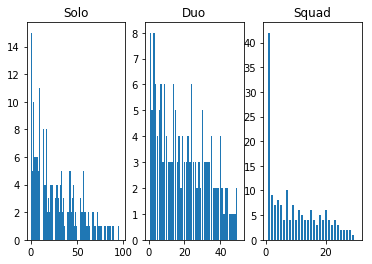

In [120]:
plt.subplot(1, 3, 1) #3
plt.title('Solo')
plt.bar(x='team_placement', height='player_kills', data=df_solo1000) #3

plt.subplot(1, 3, 2)
plt.title('Duo')

plt.bar(x='team_placement', height='player_kills', data=df_duo1000)

plt.subplot(1, 3, 3)
plt.title('Squad')

plt.bar(x='team_placement', height='player_kills', data=df_squad1000)

In [99]:
sns.jointplot(x='player_dist_walk', y='player_kills', data=df_solo1000, kind='hex')

TypeError: pairplot() got multiple values for argument 'data'

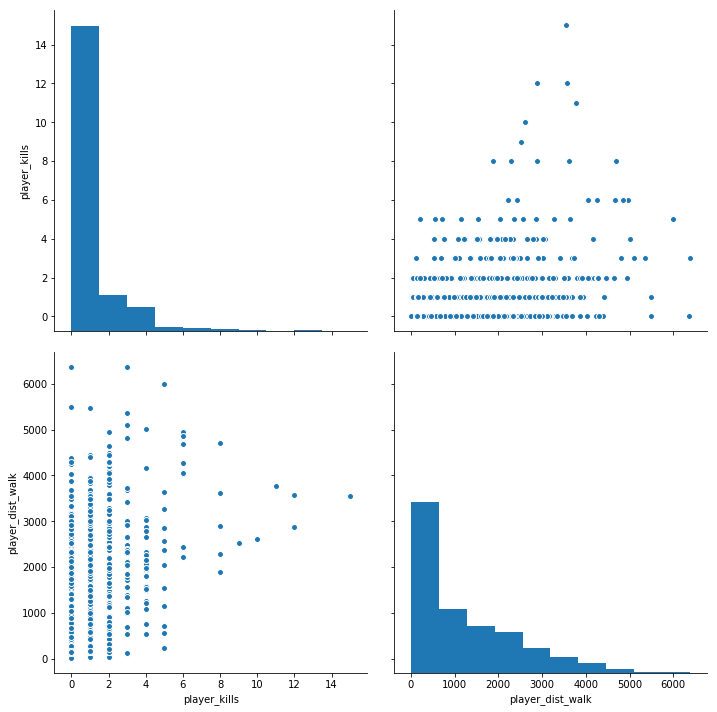

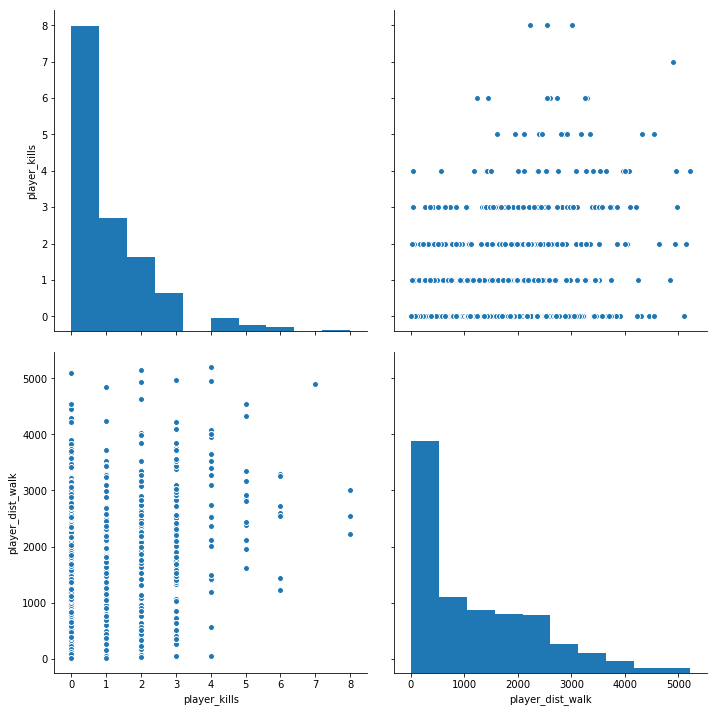

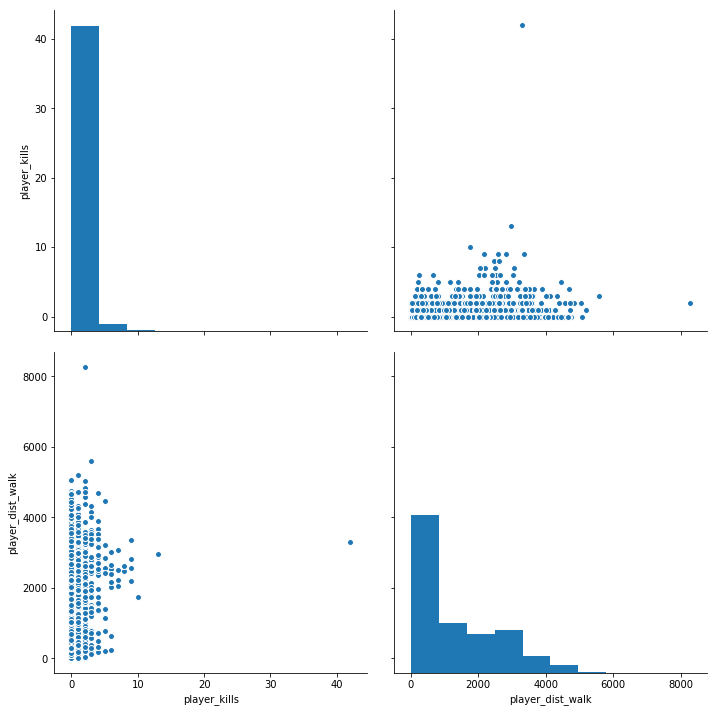

In [131]:
sns.pairplot(df_solo1000[['player_kills', 'player_dist_walk']], size=5) #4 Most of the killings happen within the first 1000 feet of player movement


sns.pairplot(df_duo1000[['player_kills', 'player_dist_walk']], size=5)


sns.pairplot(df_squad1000[['player_kills', 'player_dist_walk']], size=5)

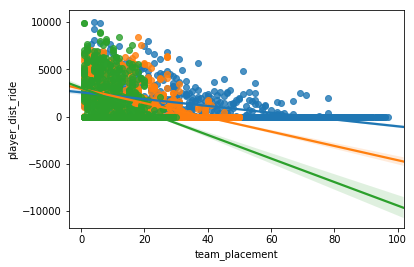

In [136]:
#5

sns.regplot(x='team_placement', y='player_dist_ride', data=df_solo1000)

sns.regplot(x='team_placement', y='player_dist_ride', data=df_duo1000)

sns.regplot(x='team_placement', y='player_dist_ride', data=df_squad1000)


In [160]:
a = df_solo1000.set_index('player_survive_time') #changing the index to survival time and sorting them for question 6
a.sort_values(by=['player_survive_time'])


,Unnamed: 0,player_dist_walk,player_dmg,team_placement,player_dist_ride,game_size,party_size,player_kills,player_survival_time
player_survive_time,,,,,,,,,
1.0,2468,17.784970,100,84,0.00000,85,1,1,1.0
1.0,2586,76.011570,0,87,0.00000,96,1,0,1.0
1.0,2585,80.551900,54,88,0.00000,96,1,0,1.0
1.0,2740,16.453491,0,97,0.00000,97,1,0,1.0
1.0,2325,8.325883,72,62,0.00000,63,1,0,1.0
1.0,930,20.971172,95,90,0.00000,94,1,0,1.0
1.0,4140,49.061280,36,82,0.00000,83,1,0,1.0
1.0,4148,49.238773,198,80,0.00000,83,1,1,1.0
1.0,2574,47.014810,0,92,0.00000,96,1,0,1.0


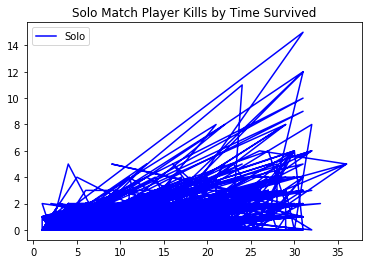

In [159]:
#6

plt.title('Solo Match Player Kills by Time Survived')

plt.plot(a['player_kills'], color='blue', label='Solo') #A time series plot, note useful since the only time related
#column to my datat set is survival time, to which there are many duplicates

plt.legend(loc='upper left')